Name: Stock Market Analysis

Project Type: Deep Learning: Long short-term memory (LSTM)

Analyzing the risk of a stock based on its previous performance history. Predicting future stock prices using LSTM.

In [1]:
import pandas as pd
import numpy as np

import matplotlib.pyplot as plt
import seaborn as sns
sns.set_style('whitegrid')
plt.style.use("fivethirtyeight")
%matplotlib inline

# For reading stock data from yahoo
from pandas_datareader.data import DataReader
import yfinance as yf
from pandas_datareader import data as pdr

yf.pdr_override()

# For time stamps
from datetime import datetime


# The tech stocks we'll use for this analysis
tech_list = ['AAPL', 'GOOG', 'MSFT', 'AMZN']

# Set up End and Start times for data grab
tech_list = ['AAPL', 'GOOG', 'MSFT', 'AMZN']

end = datetime.now()
start = datetime(end.year - 1, end.month, end.day)

for stock in tech_list:
    globals()[stock] = yf.download(stock, start, end)

company_list = [AAPL, GOOG, MSFT, AMZN] 
company_name = ["APPLE", "GOOGLE", "MICROSOFT", "AMAZON"]

for company, com_name in zip(company_list, company_name):
    company["company_name"] = com_name
    
df = pd.concat(company_list, axis=0)
df.tail(10)

[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed


,Open,High,Low,Close,Adj Close,Volume,company_name
Date,,,,,,,
2023-01-23 00:00:00-05:00,97.559998,97.779999,95.860001,97.519997,97.519997,76501100,AMAZON
2023-01-24 00:00:00-05:00,96.930000,98.089996,96.000000,96.320000,96.320000,66929500,AMAZON
2023-01-25 00:00:00-05:00,92.559998,97.239998,91.519997,97.180000,97.180000,94261600,AMAZON
2023-01-26 00:00:00-05:00,98.239998,99.489998,96.919998,99.220001,99.220001,68523600,AMAZON
2023-01-27 00:00:00-05:00,99.529999,103.489998,99.529999,102.239998,102.239998,87678100,AMAZON
2023-01-30 00:00:00-05:00,101.089996,101.739998,99.010002,100.550003,100.550003,70691900,AMAZON
2023-01-31 00:00:00-05:00,101.160004,103.349998,101.139999,103.129997,103.129997,66527300,AMAZON
2023-02-01 00:00:00-05:00,102.529999,106.239998,101.239998,105.150002,105.150002,80450100,AMAZON
2023-02-02 00:00:00-05:00,110.250000,114.000000,108.879997,112.910004,112.910004,158154200,AMAZON


Descriptive Statistics about the Data

In [2]:
AAPL.describe()

,Open,High,Low,Close,Adj Close,Volume
count,252.000000,252.000000,252.000000,252.000000,252.000000,2.520000e+02
mean,151.770278,153.907857,149.758532,151.913690,151.548162,8.563237e+07
std,13.035935,12.917801,13.045794,13.005076,12.816346,2.299676e+07
min,126.010002,127.769997,124.169998,125.019997,125.019997,3.519590e+07
25%,142.120003,143.987495,139.974998,142.472496,142.198219,7.019855e+07
50%,149.580002,151.655006,147.825005,150.524994,150.180428,8.075445e+07
75%,162.452499,165.194996,159.774998,163.177498,162.442616,9.390958e+07
max,178.550003,179.610001,176.699997,178.960007,178.154037,1.826020e+08


Information About the Data

In [3]:
AAPL.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 252 entries, 2022-02-03 00:00:00-05:00 to 2023-02-03 00:00:00-05:00
Data columns (total 7 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   Open          252 non-null    float64
 1   High          252 non-null    float64
 2   Low           252 non-null    float64
 3   Close         252 non-null    float64
 4   Adj Close     252 non-null    float64
 5   Volume        252 non-null    int64  
 6   company_name  252 non-null    object 
dtypes: float64(5), int64(1), object(1)
memory usage: 15.8+ KB


Closing Price

The closing price is the last price at which the stock is traded during the regular trading day. 
A stock’s closing price is the standard benchmark used by investors to track its performance over time.

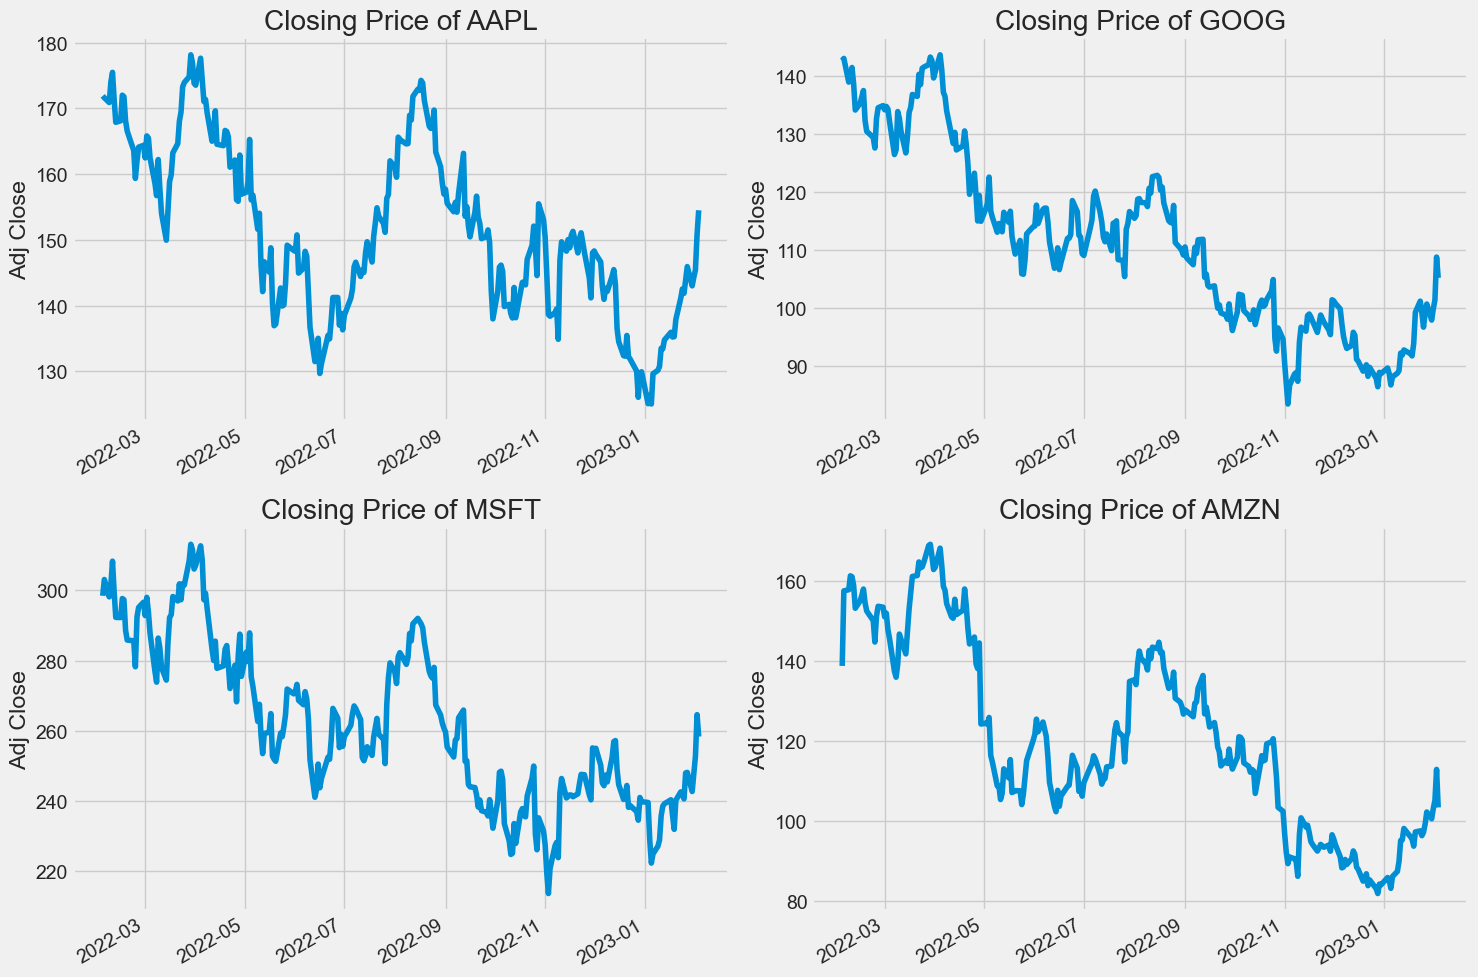

In [4]:
# Let's see a historical view of the closing price
plt.figure(figsize=(15, 10))
plt.subplots_adjust(top=1.25, bottom=1.2)

for i, company in enumerate(company_list, 1):
    plt.subplot(2, 2, i)
    company['Adj Close'].plot()
    plt.ylabel('Adj Close')
    plt.xlabel(None)
    plt.title(f"Closing Price of {tech_list[i - 1]}")
    
plt.tight_layout()

Volume of Sales

Volume is the amount of an asset or security that changes hands over some period of time, often over the course of a day.

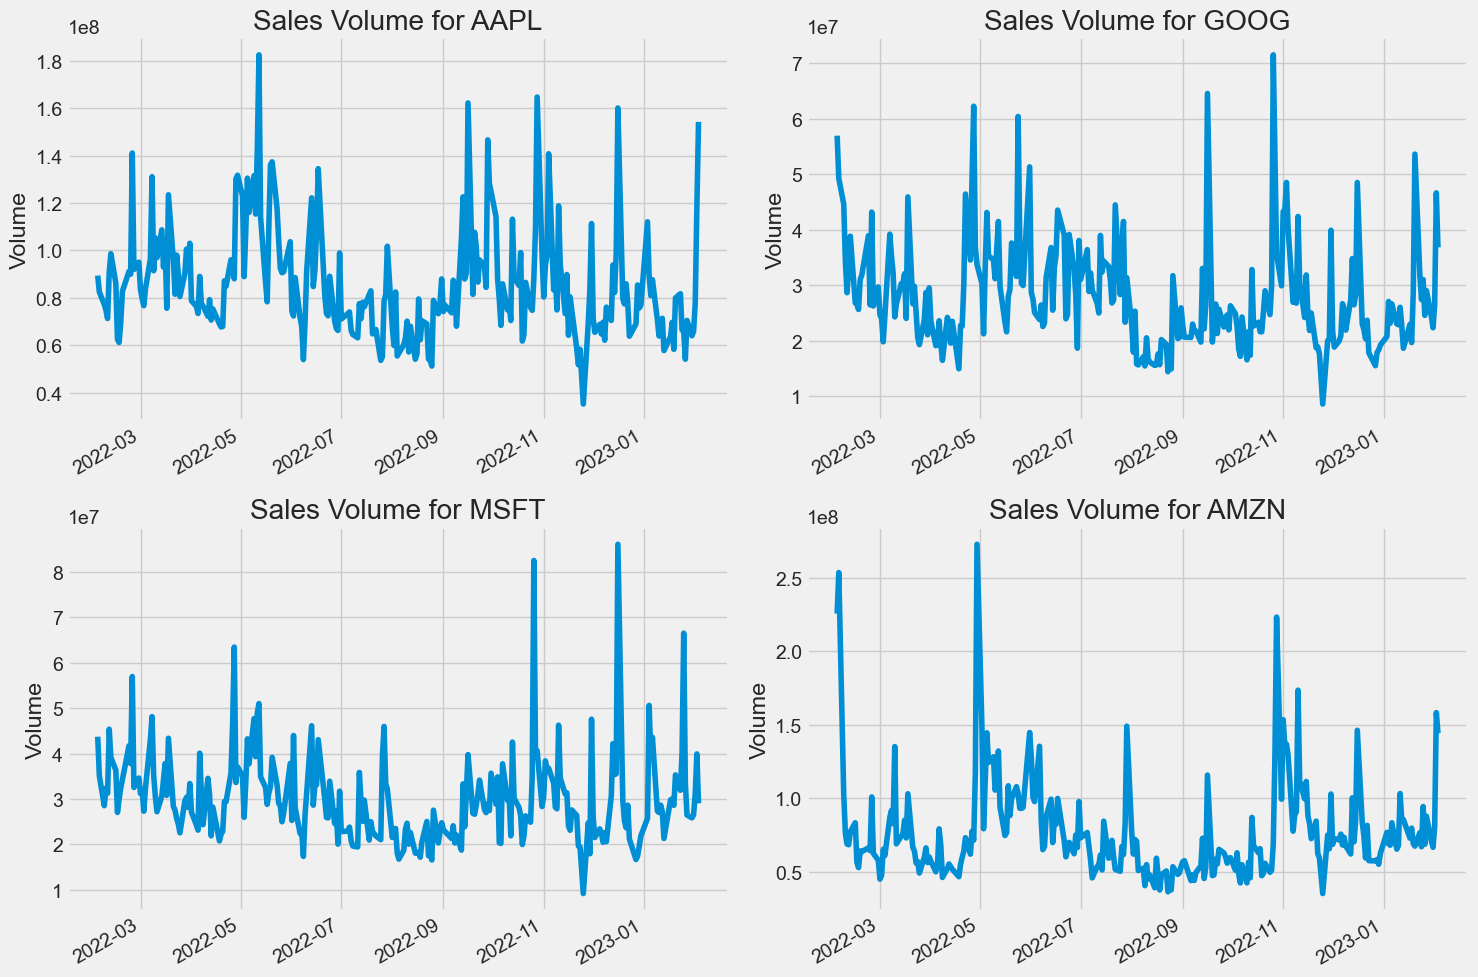

In [5]:
plt.figure(figsize=(15, 10))
plt.subplots_adjust(top=1.25, bottom=1.2)

for i, company in enumerate(company_list, 1):
    plt.subplot(2, 2, i)
    company['Volume'].plot()
    plt.ylabel('Volume')
    plt.xlabel(None)
    plt.title(f"Sales Volume for {tech_list[i - 1]}")
    
plt.tight_layout()

Compute the Moving Average (MA),  simple technical analysis tool that smooths out price data by creating a constantly updated average price.

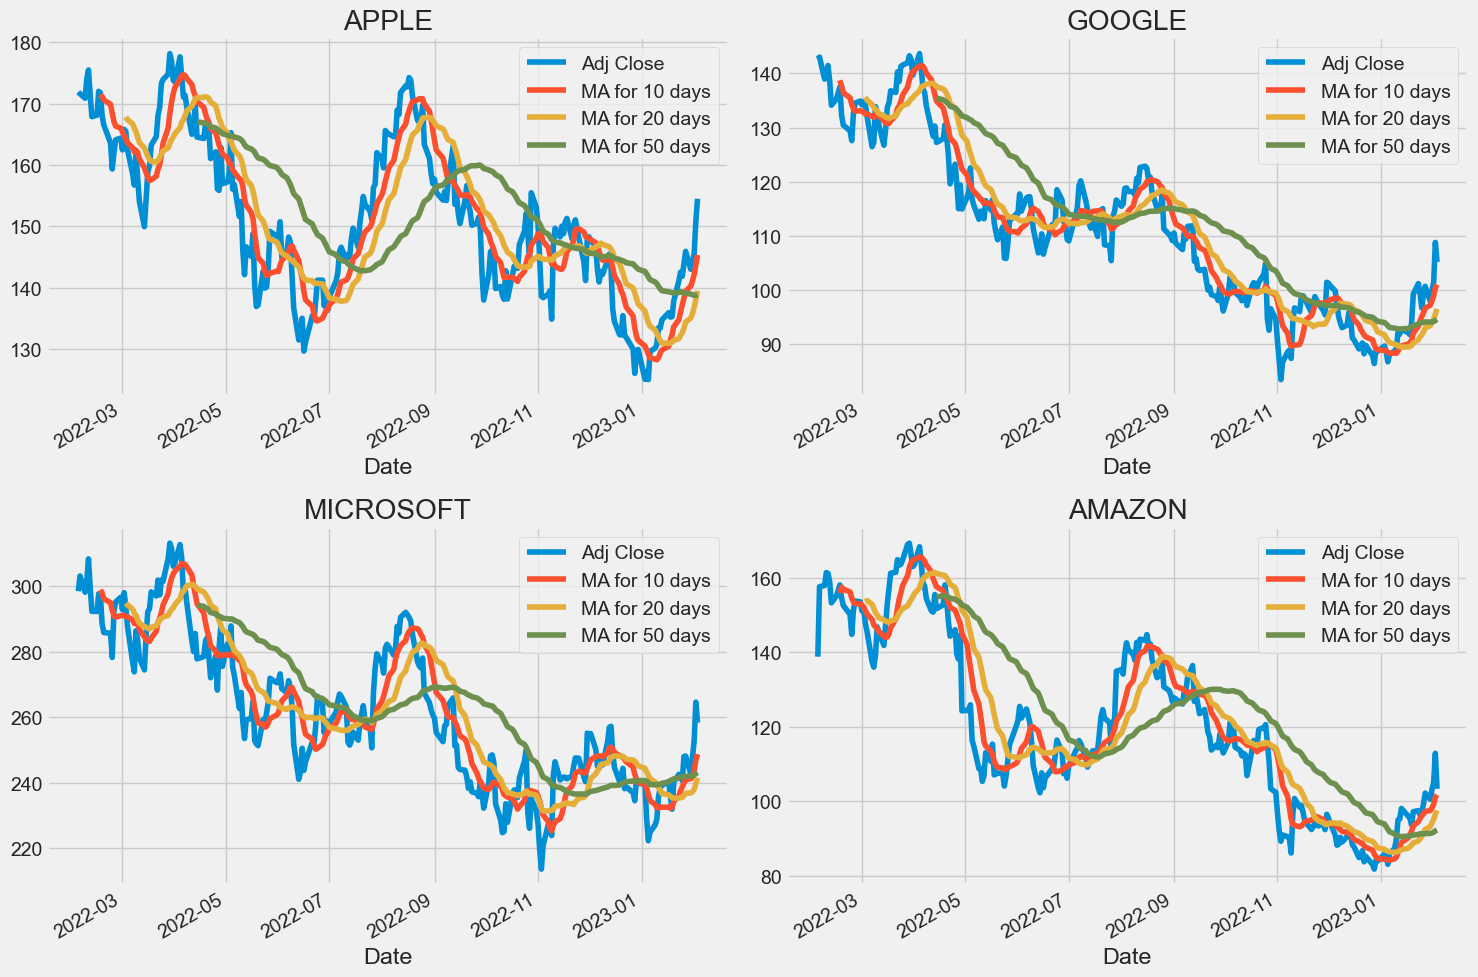

In [6]:
ma_day = [10, 20, 50]

for ma in ma_day:
    for company in company_list:
        column_name = f"MA for {ma} days"
        company[column_name] = company['Adj Close'].rolling(ma).mean()
        

fig, axes = plt.subplots(nrows=2, ncols=2)
fig.set_figheight(10)
fig.set_figwidth(15)

AAPL[['Adj Close', 'MA for 10 days', 'MA for 20 days', 'MA for 50 days']].plot(ax=axes[0,0])
axes[0,0].set_title('APPLE')

GOOG[['Adj Close', 'MA for 10 days', 'MA for 20 days', 'MA for 50 days']].plot(ax=axes[0,1])
axes[0,1].set_title('GOOGLE')

MSFT[['Adj Close', 'MA for 10 days', 'MA for 20 days', 'MA for 50 days']].plot(ax=axes[1,0])
axes[1,0].set_title('MICROSOFT')

AMZN[['Adj Close', 'MA for 10 days', 'MA for 20 days', 'MA for 50 days']].plot(ax=axes[1,1])
axes[1,1].set_title('AMAZON')

fig.tight_layout()

Analize the risk of the stock to check what was the daily return of the stock on average

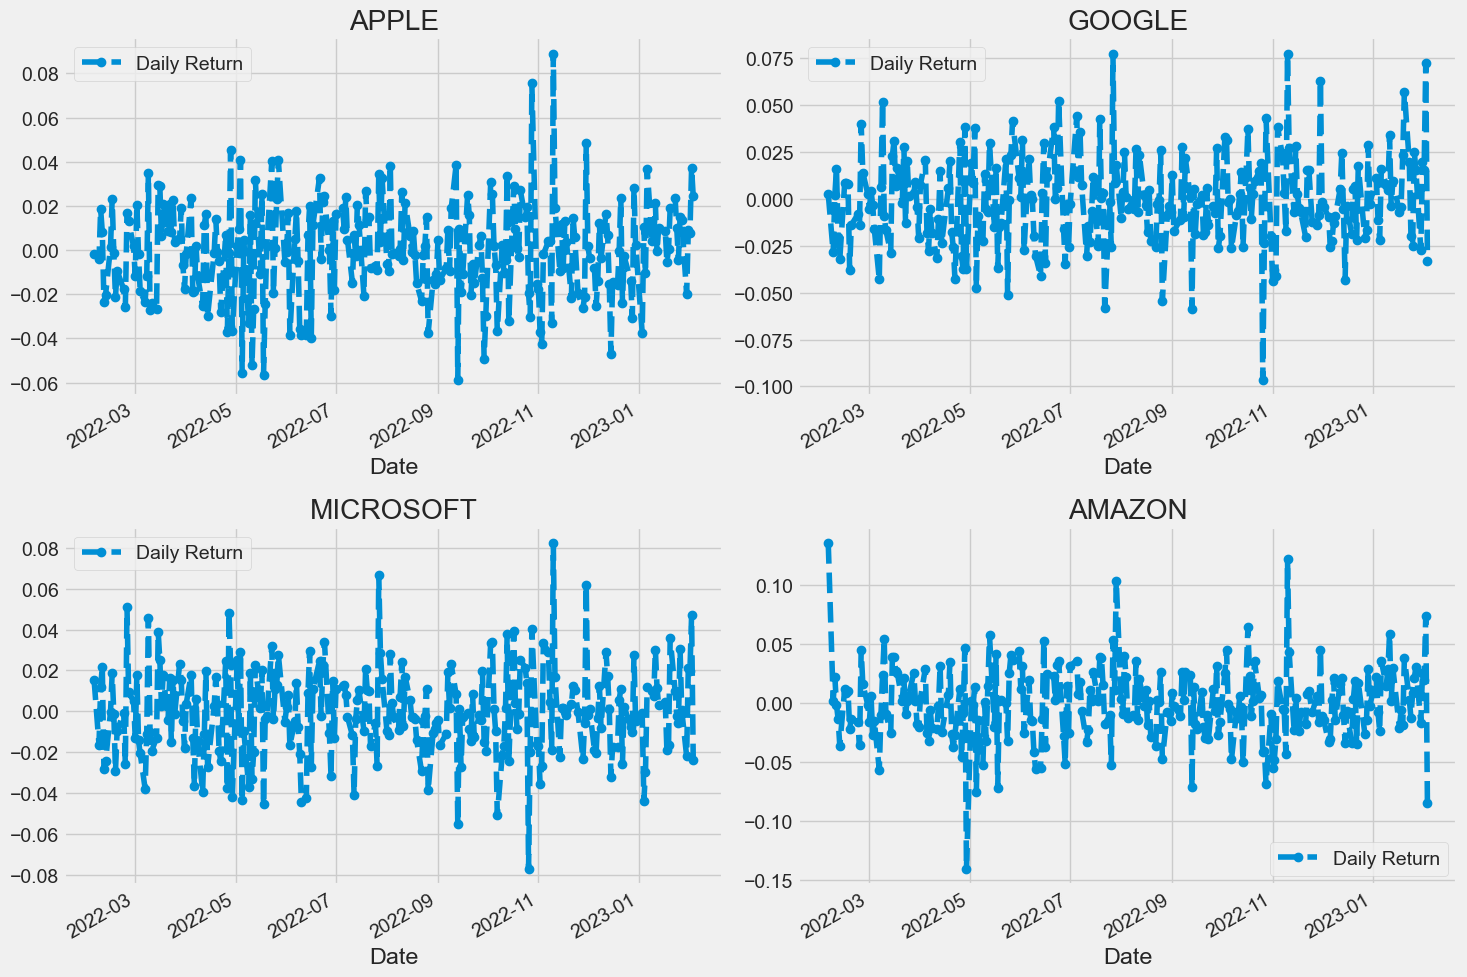

In [7]:
for company in company_list:
    company['Daily Return'] = company['Adj Close'].pct_change()

# Then we'll plot the daily return percentage
fig, axes = plt.subplots(nrows=2, ncols=2)
fig.set_figheight(10)
fig.set_figwidth(15)

AAPL['Daily Return'].plot(ax=axes[0,0], legend=True, linestyle='--', marker='o')
axes[0,0].set_title('APPLE')

GOOG['Daily Return'].plot(ax=axes[0,1], legend=True, linestyle='--', marker='o')
axes[0,1].set_title('GOOGLE')

MSFT['Daily Return'].plot(ax=axes[1,0], legend=True, linestyle='--', marker='o')
axes[1,0].set_title('MICROSOFT')

AMZN['Daily Return'].plot(ax=axes[1,1], legend=True, linestyle='--', marker='o')
axes[1,1].set_title('AMAZON')

fig.tight_layout()

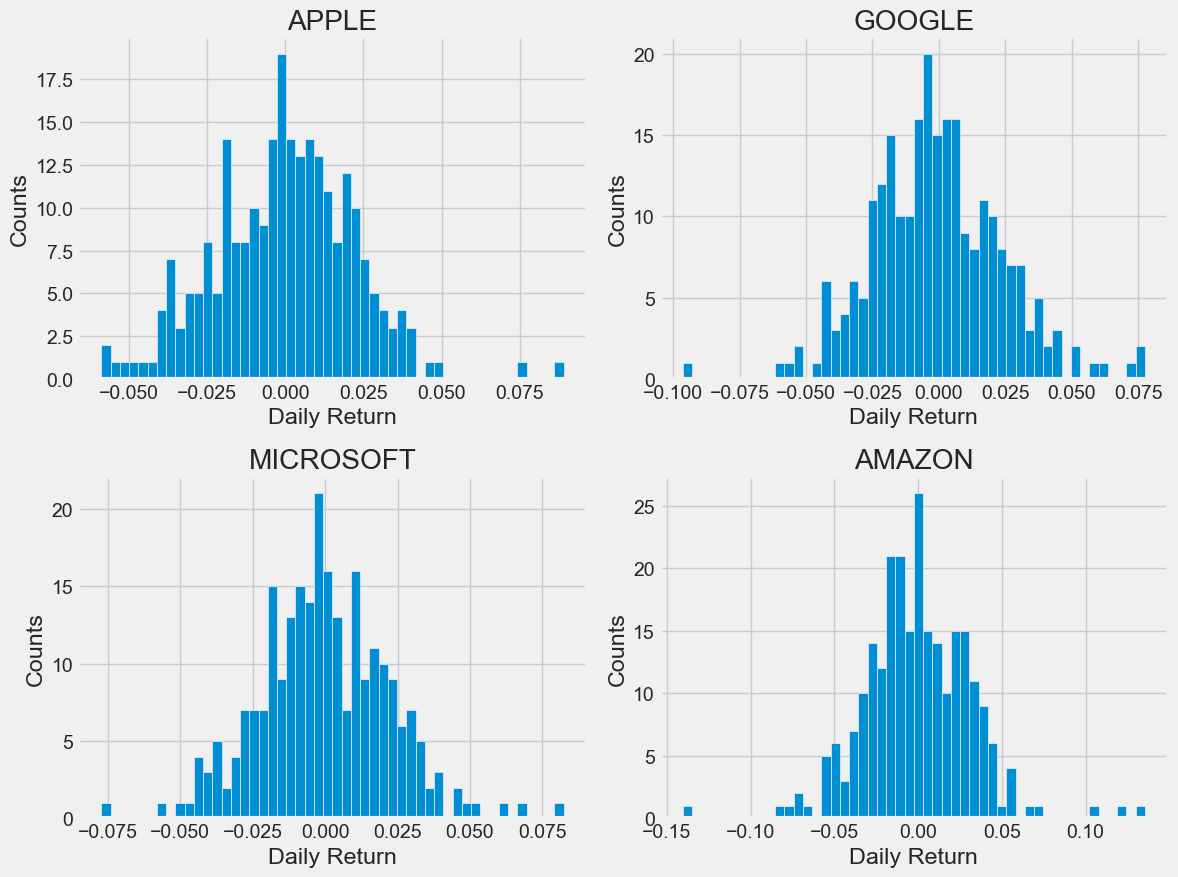

In [8]:
# Compute the average daily return as an histogram chart
plt.figure(figsize=(12, 9))

for i, company in enumerate(company_list, 1):
    plt.subplot(2, 2, i)
    company['Daily Return'].hist(bins=50)
    plt.xlabel('Daily Return')
    plt.ylabel('Counts')
    plt.title(f'{company_name[i - 1]}')
    
plt.tight_layout()

Obtain correlation

In [9]:
# Grab all the closing prices for the tech stock list into one DataFrame
closing_df = pdr.get_data_yahoo(tech_list, start=start, end=end)['Adj Close']

# Make a new tech returns DataFrame
tech_rets = closing_df.pct_change()
tech_rets.head()

[*********************100%***********************]  4 of 4 completed


,AAPL,AMZN,GOOG,MSFT
Date,,,,
2022-02-03 00:00:00-05:00,NaN,NaN,NaN,NaN
2022-02-04 00:00:00-05:00,-0.001679,0.135359,0.002562,0.015569
2022-02-07 00:00:00-05:00,-0.004235,0.001878,-0.028514,-0.016310
2022-02-08 00:00:00-05:00,0.018467,0.022022,0.001979,0.011995
2022-02-09 00:00:00-05:00,0.008294,-0.001388,0.016090,0.021835
